# Agriculture data - Analysis

This project is about analysing agriculture data of our country. I got this dataset from kaggle.

In [1]:
import pandas as pd
import numpy as np

# Step 1: Selecting a real world dataset


In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/abhinand05/crop-production-in-india' 

In [4]:
import opendatasets as od
# od.download(dataset_url)

In [5]:
project_name = "agriculture-data-case-study"

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "himanshukumar54238/agriculture-data-case-study" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/himanshukumar54238/agriculture-data-case-study


'https://jovian.com/himanshukumar54238/agriculture-data-case-study'

# Step 2: Data preparation and cleaning

In [9]:
agri_df = pd.read_csv('crop_production.csv')

In [10]:
agri_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [11]:
agri_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [12]:
agri_df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

### The given dataset has 3730 rows in `production` column as `null`.

In [13]:
agri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [14]:
agri_df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [15]:
season = agri_df['Season'].unique()
season

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [16]:
districts = agri_df['District_Name'].unique()
len(districts)

646

In [17]:
years = agri_df['Crop_Year'].unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [18]:
states = agri_df['State_Name'].unique()
print(states)

print('''
============================================================================================
''')

print("Numbers of states for which dataset is availabe are: ", len(states))

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


Numbers of states for which dataset is availabe are:  33


In [19]:
crop = agri_df['Crop'].unique()
season = agri_df['Season'].unique()

print(crop)
print(len(crop))

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [20]:
season

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

#### 124 unique crop are there in the dataset.

#### Assumptions:
> - Since the units of Area and Production is not specified, we will assume them to be in Hectare and tons repectively

### Dropping rows with null `production` data.

In [21]:
df_copy = agri_df.dropna()

In [22]:
df_copy.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [23]:
df_copy.shape

(242361, 7)

> Now there are no `null` values in the dataset, which shows that dataset is clean for exploratory analysis and visualization.

## 3. Exploratory Analysis and Visualization


##### Few major crops are:

> Rice, Wheat, Sugarcane, Peas & beans (Pulses), Tomato, Bajra, Turmeric.
> So, we will try to analyse the production statistics, which district is producing which crop most?

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [25]:
# selected_seasons = ['Rabi', 'Kharif', 'Winter', 'Summer']
# seasons_data = df_copy[df_copy['Season'].isin(selected_seasons)]

# season_production = seasons_data.groupby('Season')['Production'].sum().reset_index()

# plt.figure(figsize=(10, 6))
# plt.bar(season_production['Season'], season_production['Production'])
# plt.xlabel('Season')
# plt.ylabel('Production')
# plt.title('Crop Production Comparison: Rabi, Kharif, Winter, Summer')
# plt.xticks(range(len(season_production['Season'])), season_production['Season'])  # Set x-labels
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


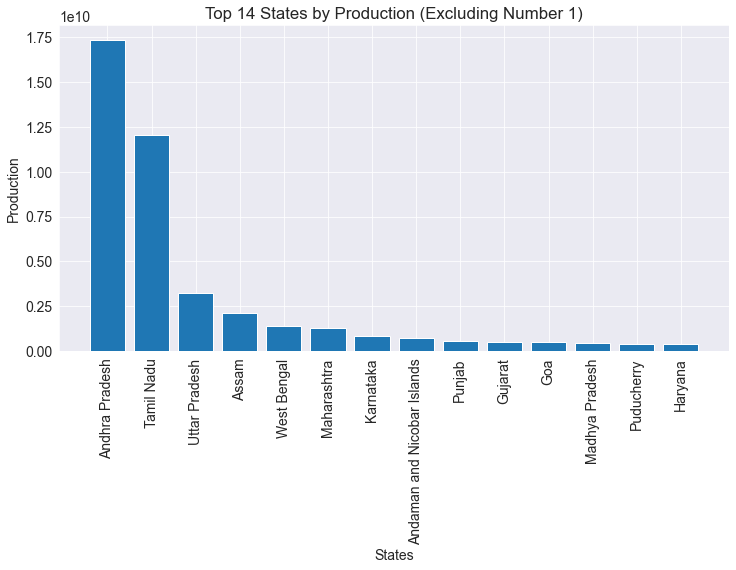

In [26]:
state_production = df_copy.groupby('State_Name')['Production'].sum()

sorted_states_desc = state_production.sort_values(ascending=False)

top_15_states_desc = sorted_states_desc.head(15)

top_14_states_desc = top_15_states_desc[1:]

plt.figure(figsize=(12, 6))
plt.bar(top_14_states_desc.index, top_14_states_desc.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

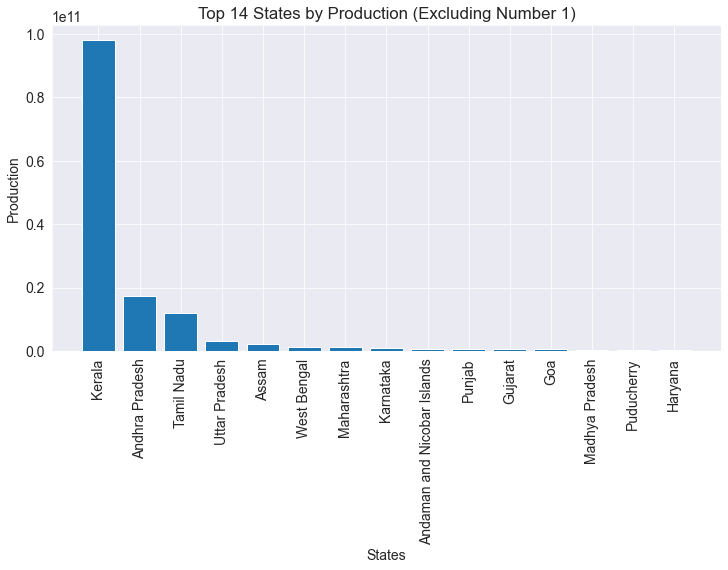

In [27]:
# state_production = df_copy.groupby('State_Name')['Production'].sum()
# state_production.sort_values(ascending=False)

state_production = df_copy.groupby('State_Name')['Production'].sum()

sorted_states_desc = state_production.sort_values(ascending=False)

top_15_states_desc = sorted_states_desc.head(15)

top_14_states_desc = top_15_states_desc[0:]

plt.figure(figsize=(12, 6))
plt.bar(top_14_states_desc.index, top_14_states_desc.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

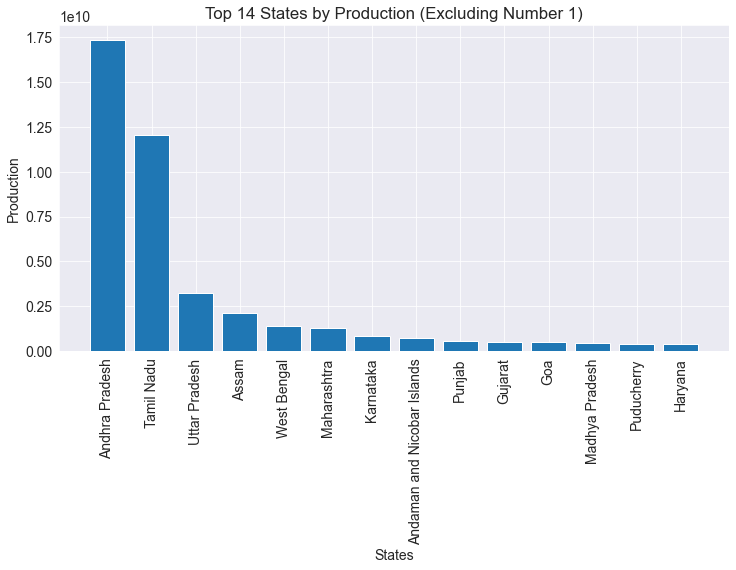

In [28]:
state_production = df_copy.groupby('State_Name')['Production'].sum()

sorted_states_desc = state_production.sort_values(ascending=False)

top_15_states_desc = sorted_states_desc.head(15)

top_14_states_desc = top_15_states_desc[1:]

plt.figure(figsize=(12, 6))
plt.bar(top_14_states_desc.index, top_14_states_desc.values)
plt.xlabel('States')
plt.ylabel('Production')
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

# Prominent crops in Andhra Pradesh

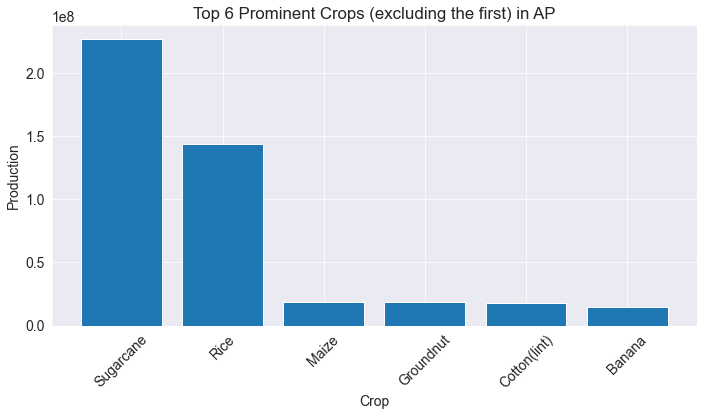

In [29]:
df1 = df_copy
kerala_data = df1[df1['State_Name'] == 'Andhra Pradesh']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

plt.figure(figsize=(10, 6))
plt.bar(top_6_crops['Crop'], top_6_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 6 Prominent Crops (excluding the first) in AP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Sugarcane and rice are the prominent crops in Andhra Pradesh.
- Sugarcane has a high production quantity.
- Rice production quantity is comparable to sugarcane.
- Maize, groundnut, cotton (lint), and banana have relatively low production quantities.
- The production quantities of maize, groundnut, cotton (lint), and banana are much less compared to sugarcane and rice.

# Prominent crops in `Kerala`

In [30]:
df = pd.read_csv('crop_production.csv')

kerala_data = df[df['State_Name'] == 'Kerala']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

print("Top 5 Prominent Crops in Kerala:")
print(prominent_crops.head(5))

Top 5 Prominent Crops in Kerala:
         Crop    Production
11   Coconut   9.780304e+10
43    Tapioca  4.611366e+07
35       Rice  1.059335e+07
2      Banana  7.655662e+06
41  Sugarcane  3.819916e+06


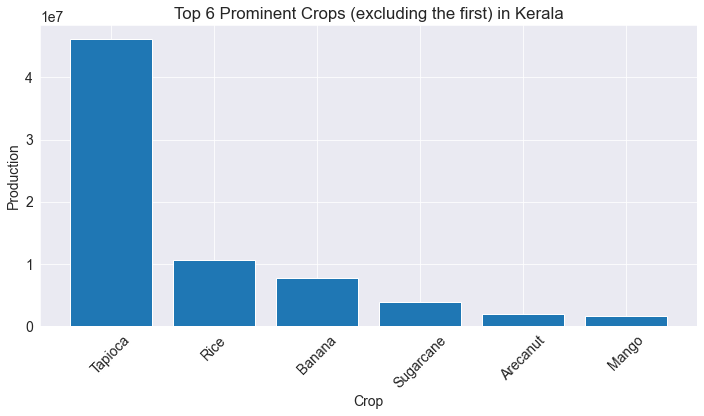

In [31]:

df = pd.read_csv('crop_production.csv')

kerala_data = df[df['State_Name'] == 'Kerala']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

plt.figure(figsize=(10, 6))
plt.bar(top_6_crops['Crop'], top_6_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 6 Prominent Crops (excluding the first) in Kerala')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Important points:
1. Coconut: Coconut is by far the most significant crop in Kerala, with a staggering production quantity of approximately 97.8 billion. This suggests that coconut farming plays a vital role in the agricultural sector and the economy of Kerala.

2. Tapioca: Tapioca, with a production quantity of around 46.1 million, holds the second position among the prominent crops in Kerala. While its production is significantly lower than coconut, it still represents a notable agricultural activity in the region.

3. Rice: Rice production in Kerala stands at approximately 10.6 million, making it the third most prominent crop. Rice is a staple food in Kerala, and its significant production indicates the importance of paddy cultivation in the state.

4. Banana: With a production quantity of around 7.7 million, banana is the fourth most prominent crop in Kerala. Bananas are widely consumed and have various uses in culinary, agricultural, and commercial applications.

5. Sugarcane: Sugarcane production in Kerala is relatively lower compared to the other crops, with a quantity of approximately 3.8 million. However, it still holds a notable position among the prominent crops in the state.

##### Inferences:
- The dominance of coconut production in Kerala showcases its significance in terms of both economic value and agricultural practices.
- Tapioca, rice, banana, and sugarcane follow coconut in terms of prominence, representing a diverse agricultural landscape in Kerala.
- The production quantities of tapioca, rice, banana, and sugarcane are significantly lower compared to coconut, indicating the dominance of coconut farming in terms of production scale.

Overall, this data highlights the importance of coconut farming in Kerala while showcasing the cultivation of other crops that contribute to the agricultural sector of the state.

In [32]:
state_production['Kerala']/state_production['Andhra Pradesh']

5.649775475400368

##### Production in Kerela(largest producer) is 5.6 times higher than Andhra Pradesh(second largest producer).
There can be several reasons for high crop production in Kerala. Here are some possible factors that contribute to high agricultural production in Kerala:

1. Favorable Climate: Kerala's tropical climate, characterized by high rainfall and humidity, provides favorable conditions for the growth of a variety of crops. The region's warm and moist climate throughout the year supports continuous agricultural activities.

2. Rich Soil: Kerala has fertile soil due to the presence of laterite and alluvial soils. These soils are nutrient-rich and well-suited for agricultural cultivation. The fertility of the soil plays a crucial role in supporting high crop yields.

3. Irrigation Facilities: Kerala has a well-developed irrigation system with numerous rivers, canals, and reservoirs. Adequate water availability and efficient irrigation facilities ensure continuous water supply for crops, especially in areas with low rainfall.

4. Agroecological Diversity: Kerala's diverse agroecological zones provide opportunities for cultivating a wide range of crops. The region has suitable conditions for the cultivation of crops like coconut, spices (such as cardamom, pepper, and cinnamon), rubber, tea, coffee, and various fruits and vegetables.

5. Farming Practices: Kerala has a tradition of adopting sustainable and organic farming practices. Many farmers in Kerala follow traditional methods, including intercropping, mixed farming, and organic farming techniques, which contribute to higher crop yields and quality.

6. Supportive Government Policies: The government of Kerala has implemented various policies and initiatives to promote agriculture and support farmers. These policies include providing subsidies, technical assistance, and financial aid to farmers, which can enhance crop production.

7. Skilled Farming Community: Kerala has a well-educated and skilled farming community. The farmers' knowledge and experience in crop cultivation techniques, pest management, and agricultural practices contribute to higher productivity.

In [33]:
# sns.distplot([0, 1, 2, 3, 4, 5])

# plt.show()

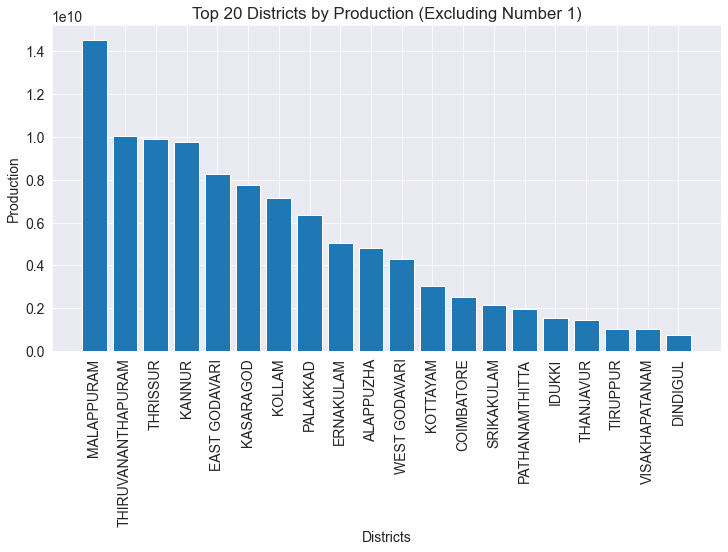

In [34]:
district_production = df_copy.groupby('District_Name')['Production'].sum()

sorted_districts_desc = district_production.sort_values(ascending=False)

top_21_districts_desc = sorted_districts_desc.head(21)

top_20_districts_desc = top_21_districts_desc[1:]

plt.figure(figsize=(12, 6))
plt.bar(top_20_districts_desc.index, top_20_districts_desc.values)
plt.xlabel('Districts')
plt.ylabel('Production')
plt.title('Top 20 Districts by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

### Insights:
1. Regional Dominance: The districts mentioned (Malappuram, Thiruvananthapuram, Thrissur, and Kannur) are located in the southern states of India, specifically in Kerala. This suggests that the southern region, particularly Kerala, has a significant contribution to overall crop production in the country.

2. Coconut Production: Given that coconut production is highest in South India, the dominance of these districts in terms of production could be attributed to the substantial cultivation and productivity of coconut in Kerala. As coconut is a major crop in Kerala, it likely plays a significant role in the overall production levels of these districts.

3. Agricultural Expertise: The high production in these districts might also be indicative of the agricultural expertise and practices prevalent in the southern states, particularly in Kerala. The farmers in these districts may have specialized knowledge and experience in coconut cultivation, contributing to the high production levels.

4. Climate and Geography: The suitable climate and geographical conditions in these districts, such as favorable temperatures, rainfall patterns, and soil fertility, could also contribute to the high crop production. These factors create an environment conducive to successful agricultural practices.


These inferences suggest that factors such as regional dominance, specialized knowledge, favorable climate and geography, and local economic impact contribute to the high production levels observed in these districts of Southern India.

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

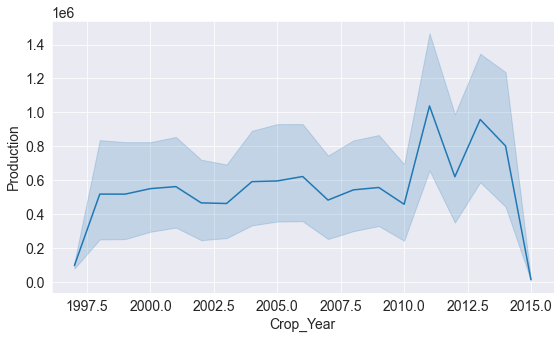

In [35]:
sns.lineplot(df_copy["Crop_Year"],df_copy["Production"])

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

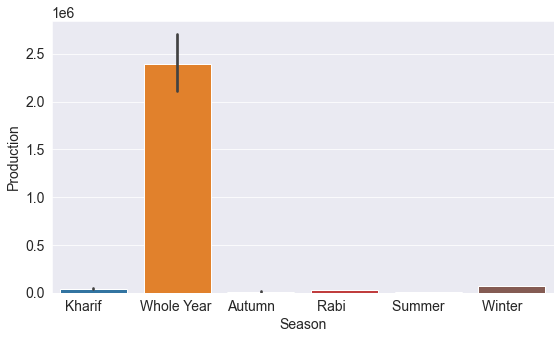

In [36]:
excluded_value = 'Whole Year'
filtered_df = df_copy[df_copy["Season"] != excluded_value]

sns.barplot(filtered_df["Season"], filtered_df["Production"])

### We will plot production in different season for some specific crops.

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


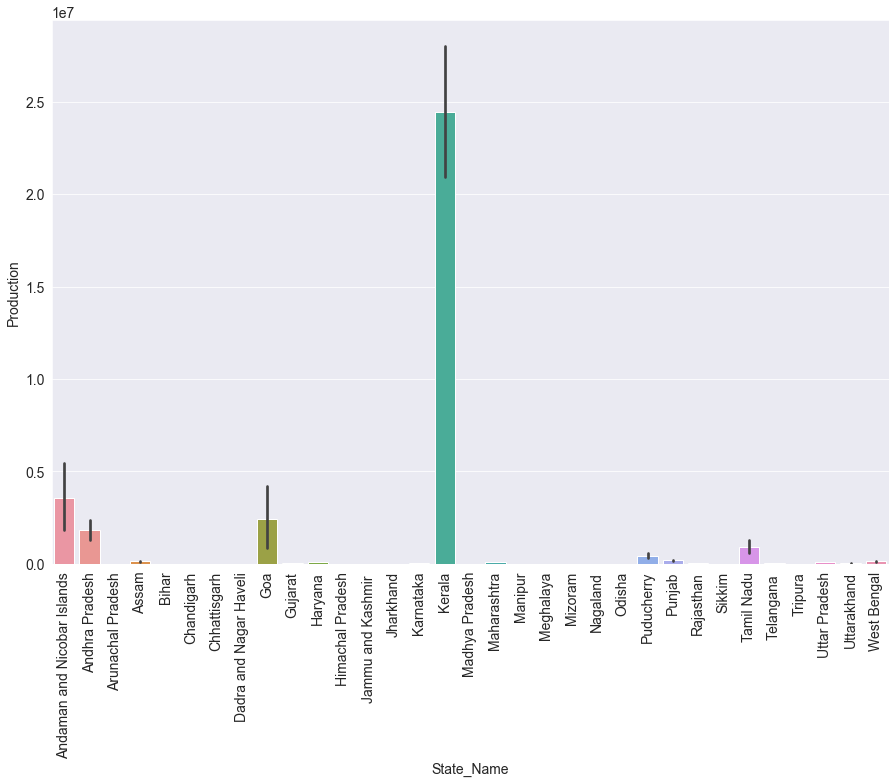

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(df_copy["State_Name"], df_copy["Production"])
plt.xticks(rotation=90)
plt.show()


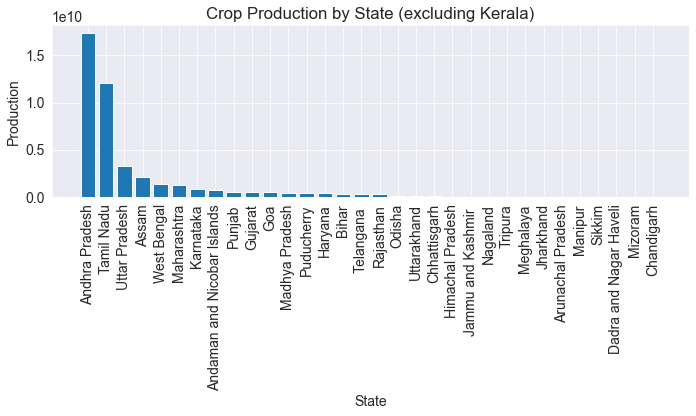

In [38]:
df = pd.read_csv('crop_production.csv')

filtered_data = df[df['State_Name'] != 'Kerala']

state_production = filtered_data.groupby('State_Name')['Production'].sum().reset_index()

sorted_states = state_production.sort_values('Production', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_states['State_Name'], sorted_states['Production'])
plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production by State (excluding Kerala)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Kerala's Outlier Status:` Kerala's exceptional production levels, especially in terms of coconut production, indicate that it has unique agricultural conditions or practices that contribute to its high production. Factors such as favorable climate, soil quality, and specialized farming techniques may contribute to this outlier status.

`Andhra Pradesh's Geographical Advantage:` As Andhra Pradesh follows Kerala in terms of high production, it suggests that the state's geography plays a crucial role in supporting significant agricultural output. The state's diverse geography encompasses coastal regions, river deltas, and fertile plains, providing conducive conditions for growing various crops.

##### 1. Wheat

In [39]:
wheat = df_copy[df_copy['Crop'] == 'Wheat']

In [40]:
wheat

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0
...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0


C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

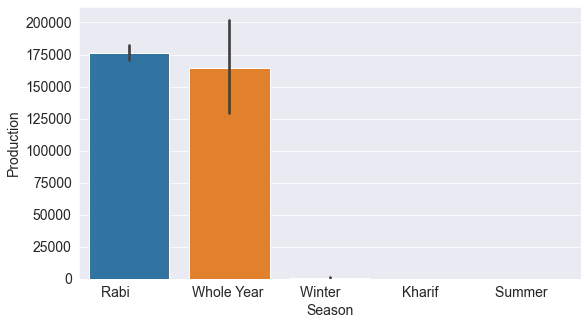

In [41]:
sns.barplot(wheat["Season"], wheat["Production"])

##### The above plot shows that `Wheat Production` in `Rabi` Season was comparatively much higher than other seasons, because `Wheat` is 
###### majorly a  `Rabi` crop.

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


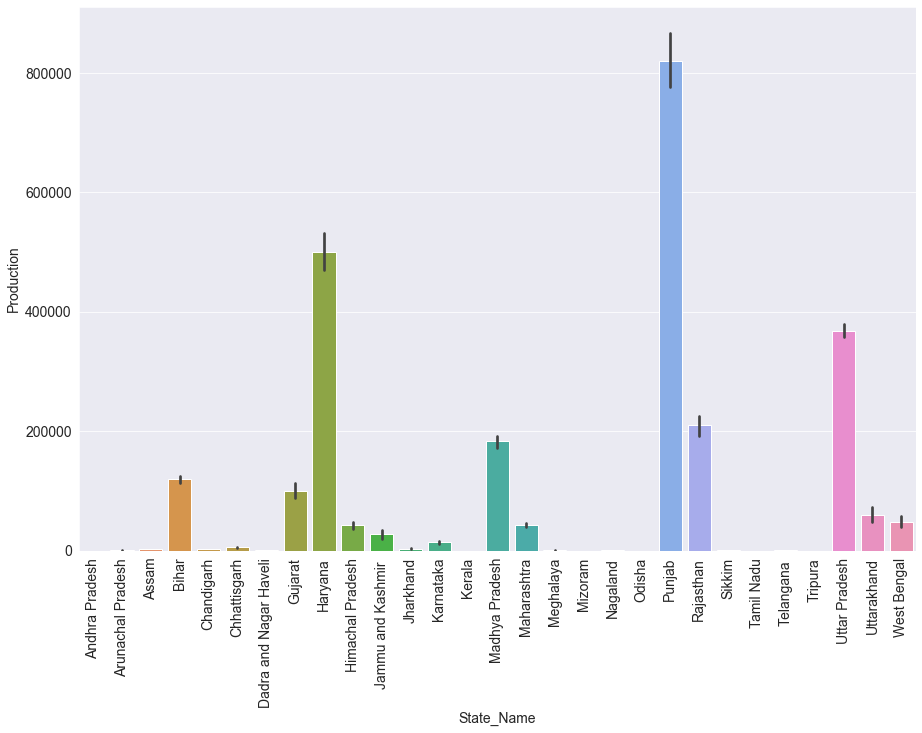

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(wheat["State_Name"], wheat["Production"])
plt.xticks(rotation=90)
plt.show()


##### `Wheat` production is highest in `Punjab` followed by `Haryana` and `Uttar Pradesh`.

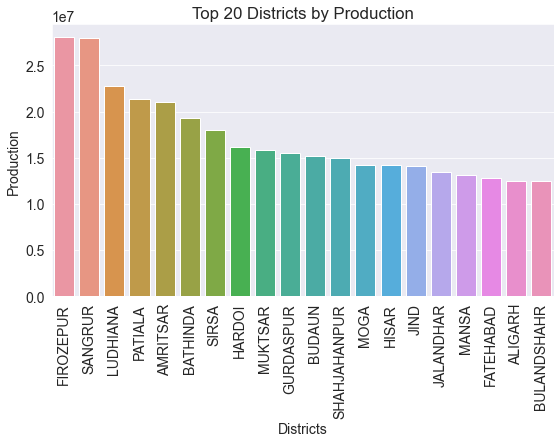

In [43]:
district_production = wheat.groupby('District_Name')['Production'].sum()

sorted_districts = district_production.sort_values(ascending=False)

top_20_districts = sorted_districts.head(20)

top_20_df_wheat = pd.DataFrame({'district': top_20_districts.index, 'production': top_20_districts.values})

sns.barplot(x='district', y='production', data=top_20_df_wheat)

plt.xticks(rotation=90)

plt.xlabel('Districts')
plt.ylabel('Production')
plt.title('Top 20 Districts by Production')

# Display the plot
plt.show()



| State          | Districts with Highest Wheat Production | Possible Reasons                                            |
|----------------|-----------------------------------------|-------------------------------------------------------------|
| Punjab         | Ferozpur, Sangrur, Patiala, Ludhiana, Amritsar, Bathinda | Fertile soil, irrigation facilities, agricultural expertise |
| Haryana        | Sirsa                                   | Fertile soil, favorable climate, irrigation facilities, agricultural expertise |
| Uttar Pradesh  | -                                       | -                                                           |

- Punjab: Punjab is known as the "Granary of India" due to its high agricultural productivity. The possible reasons for its highest wheat production are:
  - Fertile Soil: Punjab has rich alluvial soil, ideal for wheat cultivation, with a high nutrient content that supports robust crop growth.
  - Irrigation Facilities: Punjab benefits from an extensive canal irrigation system, ensuring sufficient water supply to the crops, especially during the critical growth stages.
  - Agricultural Expertise: Punjab has a history of agricultural expertise, with farmers employing modern farming techniques, advanced machinery, and improved crop varieties.
  
- Haryana: Haryana, located adjacent to Punjab, also contributes significantly to wheat production. The possible reasons for its high wheat production are:
  - Fertile Soil: Haryana possesses fertile soil similar to Punjab, allowing for successful wheat cultivation and high yields.
  - Favorable Climate: The state experiences a favorable climate for wheat cultivation, including cool winters and warm summers, which are suitable for the crop's growth.
  - Irrigation Facilities: Haryana benefits from a well-developed irrigation infrastructure, ensuring consistent water availability for wheat crops.
  - Agricultural Expertise: Like Punjab, Haryana has a strong agricultural background and expertise, with farmers adopting modern agricultural practices and technologies.

- Uttar Pradesh: While Uttar Pradesh is a major agricultural state, the districts with the highest wheat production were not specified. Therefore, it is not possible to provide specific reasons without district-level information.

### `Punjab` is the largest producer of `wheat` in the country followed by `Haryana` and 
### `Uttar Pradesh.`

##### 2. Rice

In [44]:
rice = df_copy[df_copy['Crop'] == 'Rice']

In [45]:
rice.shape

(15082, 7)

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


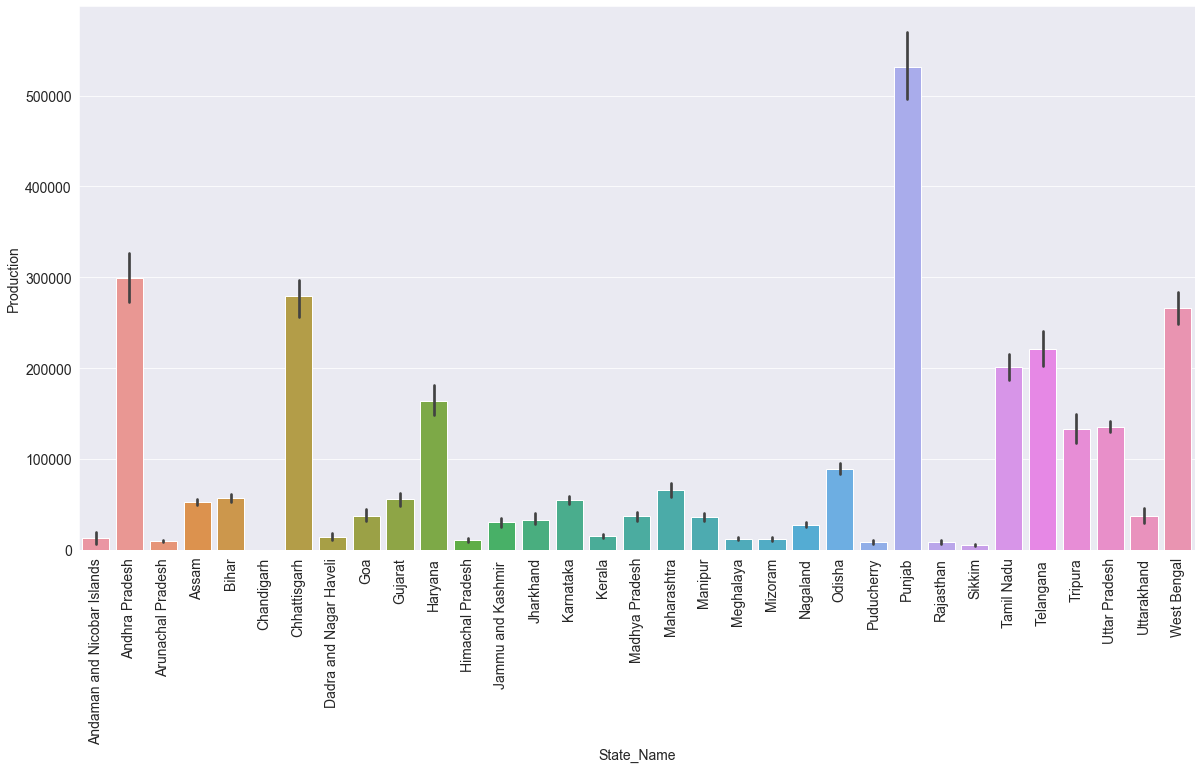

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(rice["State_Name"], rice["Production"])
plt.xticks(rotation=90)
plt.show()


##### For `Rice` also, `Punjab` is the highest producer followed by `Andhra Pradesh` and `West Bengal`.

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


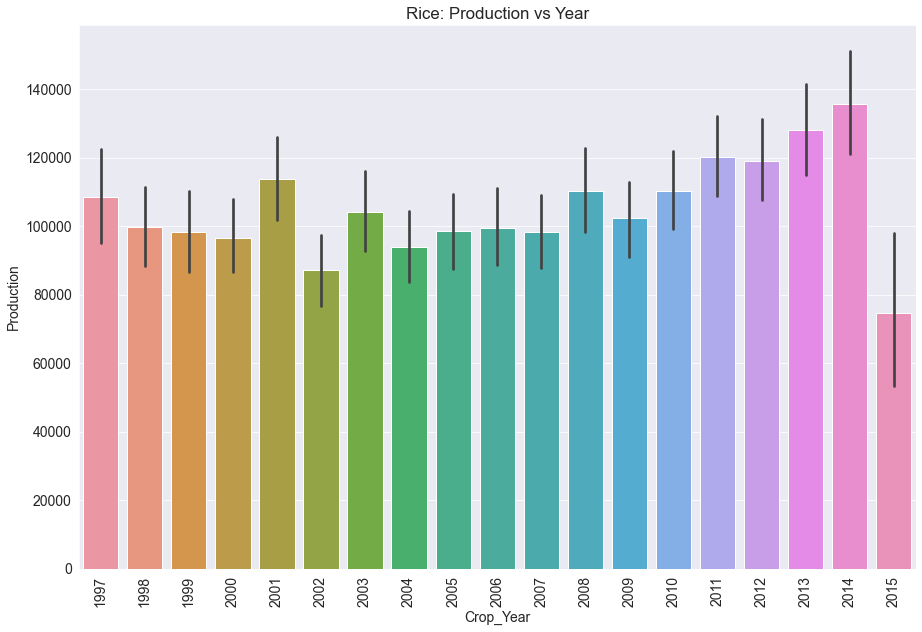

In [65]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice)
plt.xticks(rotation=90)
plt.title('Rice: Production vs Year')
plt.show()

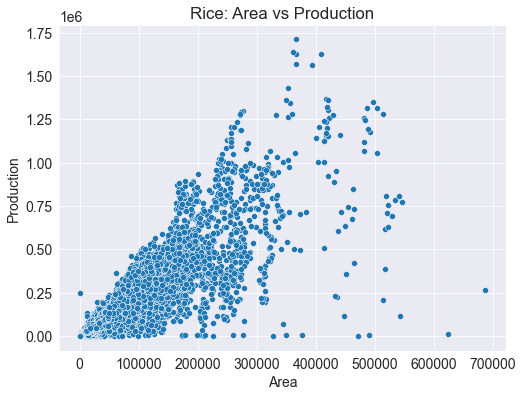

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rice, x='Area', y='Production')
plt.title('Rice: Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')

plt.show()


> The scatterplot showing most of the points concentrated near the origin suggests that there is a large number of districts with relatively lower production of both wheat and rice. These districts may have limited agricultural land or face challenges in terms of crop productivity.

In [49]:
district_production = rice.groupby('District_Name')['Production'].sum()

sorted_districts = district_production.sort_values(ascending=False)

top_20_districts = sorted_districts.head(20)

print(top_20_districts)


District_Name
BARDHAMAN             34239976.0
MEDINIPUR WEST        29192719.0
WEST GODAVARI         27845309.0
EAST GODAVARI         24690929.0
SANGRUR               24448000.0
KRISHNA               20280606.0
BIRBHUM               19753571.0
LUDHIANA              18950000.0
MURSHIDABAD           18403217.0
GUNTUR                18245831.0
BANKURA               18140197.0
MEDINIPUR EAST        17138116.0
PATIALA               16446000.0
FIROZEPUR             16281000.0
24 PARAGANAS SOUTH    15962222.0
SPSR NELLORE          15252100.0
KARIMNAGAR            14600422.0
HOOGHLY               14517541.0
NALGONDA              13959000.0
NADIA                 13755403.0
Name: Production, dtype: float64



#### Major Rice Producer Districts:
1. Bardhaman: This district is located in West Bengal.
2. Medinipur West: This district is located in West Bengal.
3. West Godavari: This district is located in Andhra Pradesh.
4. East Godavari: This district is located in Andhra Pradesh.
5. Sangrur: This district is located in Punjab.
6. Krishna: This district is located in Andhra Pradesh.
7. Birbhum: This district is located in West Bengal.

#### Inferences for Rice Production:
- Rice production is highest in the district of West Bengal, which aligns with West Bengal being one of the top states for rice production in the country.
- Cities situated on the banks of rivers are known for higher rice production due to the crop's requirement for a significant amount of water to grow. 

#### Additional Inferences:
- The scatterplot showing most of the points concentrated near the origin suggests that there is a large number of districts with relatively lower production of both wheat and rice. These districts may have limited agricultural land or face challenges in terms of crop productivity.
- Punjab emerges as a significant producer of both wheat and rice, indicating the state's agricultural prowess and favorable conditions for these crops.
- Andhra Pradesh also stands out as a major producer for both wheat and rice, highlighting the state's agricultural significance and diverse crop cultivation.

#### Summary:
- West Bengal has the highest rice production, with districts like Bardhaman, Medinipur West, and Birbhum contributing significantly.
- Punjab, Andhra Pradesh, and West Bengal emerge as key states for wheat production, with districts like Sangrur, Krishna, and West Godavari making substantial contributions.
- Rice production is observed to be higher in districts situated on the banks of rivers, which can be attributed to the water requirements of rice crops.



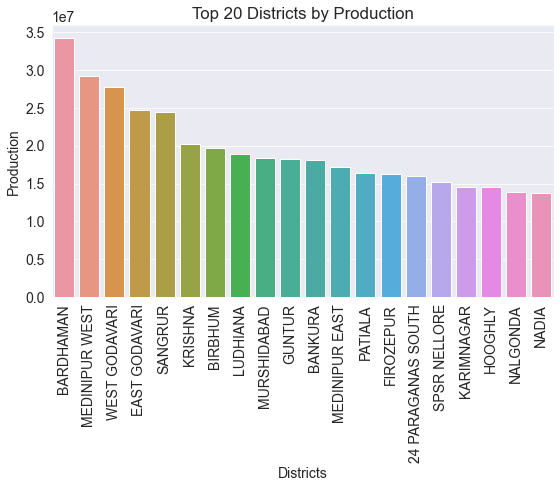

In [50]:
top_20_df = pd.DataFrame({'district': top_20_districts.index, 'production': top_20_districts.values})

sns.barplot(x='district', y='production', data=top_20_df)

plt.xticks(rotation=90)

plt.xlabel('Districts')
plt.ylabel('Production')
plt.title('Top 20 Districts by Production')

plt.show()

##### `Rice` production is highest in district of `West Bengal` and city which are situated on banks of any river, as `Rice` is a crop which huge amount water to grow.

In [51]:
crop_production = df_copy.groupby('Crop')['Production'].sum()

sorted_crops_asc = crop_production.sort_values(ascending=True)

top_20_crops_asc = sorted_crops_asc.head(20)

sorted_crops_desc = crop_production.sort_values(ascending=False)

top_20_crops_desc = sorted_crops_desc.head(20)

print("Top 20 Crops by Production (Ascending Order):\n", top_20_crops_asc)

print("\nTop 20 Crops by Production (Descending Order):\n", top_20_crops_desc)


Top 20 Crops by Production (Ascending Order):
 Crop
Apple                   0.0
Pear                    0.0
Other Dry Fruit         0.0
Other Citrus Fruit      0.0
Peas  (vegetable)       0.0
Plums                   0.0
Pump Kin                0.0
Litchi                  0.0
Lab-Lab                 0.0
Ribed Guard             0.0
Cucumber                0.0
Snak Guard              0.0
Peach                   0.0
Beet Root               0.0
other fibres            0.0
Ber                     0.0
Yam                     0.0
Ash Gourd               0.0
Water Melon             0.0
Bitter Gourd          353.0
Name: Production, dtype: float64

Top 20 Crops by Production (Descending Order):
 Crop
Coconut              1.299816e+11
Sugarcane            5.535682e+09
Rice                 1.605470e+09
Wheat                1.332826e+09
Potato               4.248263e+08
Cotton(lint)         2.970000e+08
Maize                2.733418e+08
Jute                 1.815582e+08
Banana               1.461327

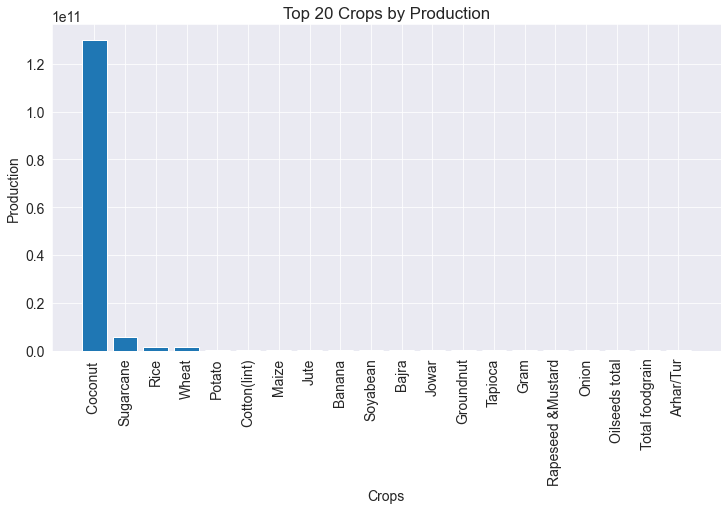

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(top_20_crops_desc.index, top_20_crops_desc.values)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Top 20 Crops by Production')
plt.xticks(rotation=90)
plt.show()


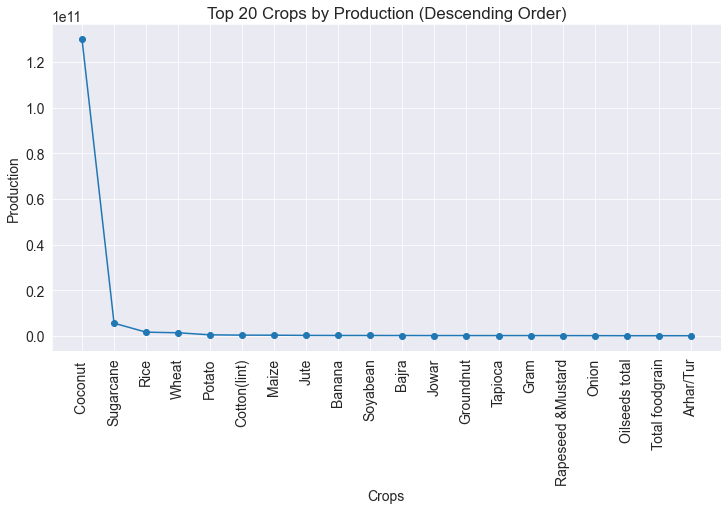

In [53]:
import matplotlib.pyplot as plt

# Assuming you have the top 20 crops by production in descending order in 'top_20_crops_desc' variable

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(top_20_crops_desc.index, top_20_crops_desc.values, marker='o')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Top 20 Crops by Production (Descending Order)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



1. Coconut Dominance: Coconut emerges as the highest produced crop by a significant margin, indicating its importance in the agricultural sector. The production level of coconut is substantially higher than that of other crops on the list.

2. Sugarcane and Rice: Sugarcane and rice follow coconut in terms of production. This suggests the significance of these crops in India's agricultural landscape, as they are widely cultivated and contribute significantly to the country's overall crop production.

3. Cereal Crops: Cereal crops such as wheat, maize, bajra, jowar, and gram are among the top 20 crops by production. This highlights the importance of these crops in providing staple food grains for the population.

4. Cash Crops: Crops like potato, cotton(lint), jute, banana, and tapioca find their place in the top 20, indicating their economic significance as cash crops. These crops not only contribute to food production but also play a crucial role in generating income and supporting various industries.

5. Legumes and Oilseeds: Legumes such as soybean and arhar/tur, along with oilseeds like rapeseed & mustard, showcase their importance in the agricultural sector. These crops contribute to the production of protein-rich food items, cooking oils, and animal feed.

6. Onion: Onion production also features in the top 20 crops, highlighting its significance as a widely consumed vegetable in India.

7. Diversity of Crop Production: The presence of multiple crops in the top 20 indicates the diverse agricultural practices and cropping patterns across different regions of India. This diversity allows for food security, economic stability, and utilization of various agro-climatic conditions.

8. Focus on Foodgrains: The inclusion of total foodgrains as a separate category emphasizes the importance of food security and the production of staple crops to meet the population's dietary needs.

Overall, the inferences suggest the significance of coconut, sugarcane, rice, cereal crops, cash crops, legumes, oilseeds, and vegetables in India's agricultural landscape. These crops contribute to food security, income generation, and the overall economic development of the country.

### `Coconut` is the highest produced crop in country followed by sugarcane and rice that can be inferred from this graph.

##### 3. Sugarcane

C:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


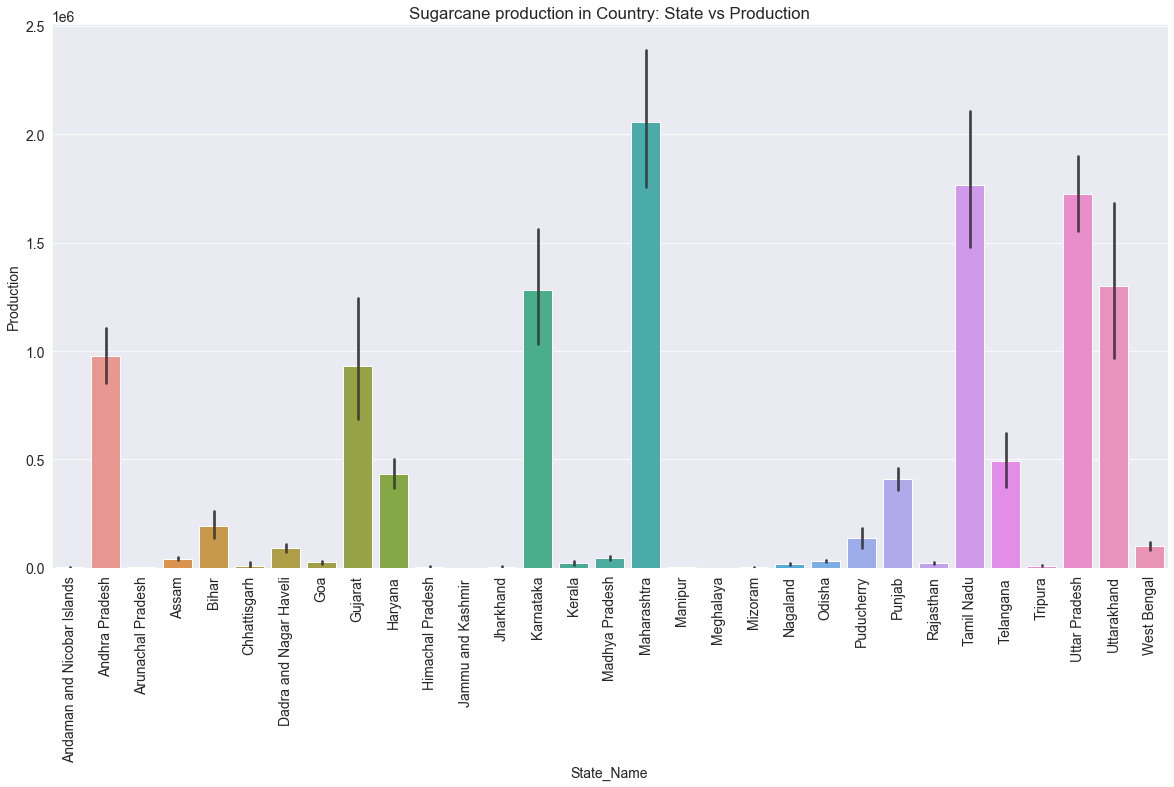

In [54]:
Sugarcane = df_copy[df_copy['Crop'] == 'Sugarcane']

plt.figure(figsize=(20,10))
sns.barplot(Sugarcane["State_Name"], Sugarcane["Production"])
plt.xticks(rotation=90)
plt.title('Sugarcane production in Country: State vs Production')
plt.show()



1. Sugarcane Production: Sugarcane is primarily produced in Maharashtra, followed by Tamil Nadu and Uttar Pradesh. These states have favorable agro-climatic conditions, irrigation facilities, and expertise in sugarcane cultivation, leading to significant production levels.

2. Maharashtra's Dominance: Maharashtra emerges as the leading state for sugarcane production. The state's large-scale cultivation of sugarcane can be attributed to factors such as suitable soil types, availability of water resources, advanced farming techniques, and a well-established sugar industry.

3. Tamil Nadu's Contribution: Tamil Nadu ranks second in sugarcane production, indicating its importance in the state's agricultural sector. Factors such as suitable climatic conditions, access to water resources, and investment in irrigation infrastructure contribute to the significant production levels.

4. Uttar Pradesh's Significance: Uttar Pradesh, one of the most populous states in India, also plays a notable role in sugarcane production. The state's fertile agricultural lands, irrigation facilities, and agricultural practices contribute to substantial sugarcane cultivation.

5. Economic Impact: Sugarcane production has significant economic implications, as it supports the sugar industry, generates employment opportunities, and contributes to the overall rural economy in the respective states.

6. Regional Variations: The dominance of Maharashtra, Tamil Nadu, and Uttar Pradesh in sugarcane production indicates regional variations in agricultural practices and preferences. These states showcase their capability to harness the potential of sugarcane cultivation within their unique agro-climatic and geographical contexts.



In [55]:
crops = ['Sugarcane', 'Coconut', 'Rice', 'Wheat', 'Potato']

filtered_df = df_copy[df_copy['Crop'].isin(crops)]

total_production = filtered_df.groupby('Crop')['Production'].sum()

for crop, production in total_production.items():
    print("Total", crop.capitalize(), "Production:", production)


Total Potato Production: 424826343.86
Total Rice Production: 1605470383.37
Total Sugarcane Production: 5535681525.92
Total Wheat Production: 1332825656.8


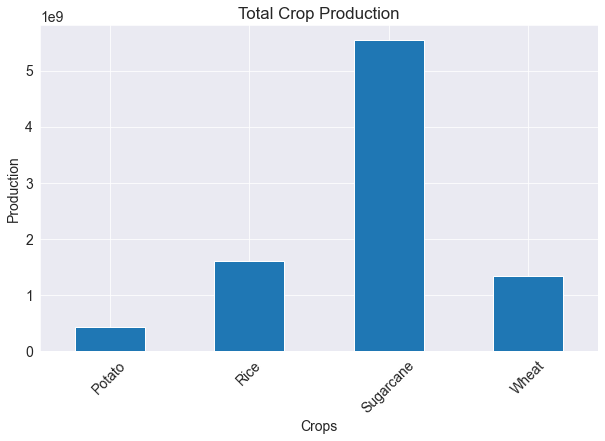

In [74]:
total_production_series = pd.Series(total_production)

plt.figure(figsize=(10, 6))
total_production_series.plot(kind='bar')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Total Crop Production')
plt.xticks(rotation=45)
plt.show()



1. Comparing Crop Production: The highest total production is observed for sugarcane with a production value of 5,535,681,525.92, followed by rice (1,605,470,383.37), wheat (1,332,825,656.8), and potato (424,826,343.86). 

2. Wide Variations in Production: There are significant differences in production levels among the crops. Sugarcane has the highest production, almost 13 times greater than potato production, and more than three times greater than both rice and wheat production.

3. Rice and Wheat Similarities: Rice and wheat production values are closer to each other compared to sugarcane and potato. The total production of rice is approximately 1.2 times higher than wheat production.

4. Dominance of Sugarcane: Sugarcane stands out as the crop with the highest production among the four, indicating its agricultural importance and economic significance.

5. Staple Food Crops: Rice and wheat, being staple food crops in India, exhibit relatively high production levels, reflecting their essential role in the country's food security.

6. Potato Production: Potato production, while lower than rice, wheat, and sugarcane, still represents a significant contribution to the overall agricultural output.

7. Crop-specific Analysis: Further analysis should be conducted to understand the factors influencing the production of each crop, such as agricultural practices, geographic suitability, climate conditions, and market demand.

8. Crop Distribution: The distribution of production among these crops indicates the diversity of agricultural practices across different regions of the country, as each crop has specific requirements and is cultivated in specific agro-climatic zones.

These statistical inferences provide an overview of the production levels and relative differences among potato, rice, sugarcane, and wheat. Further analysis and exploration of the data can help uncover more insights and patterns related to crop production in India.

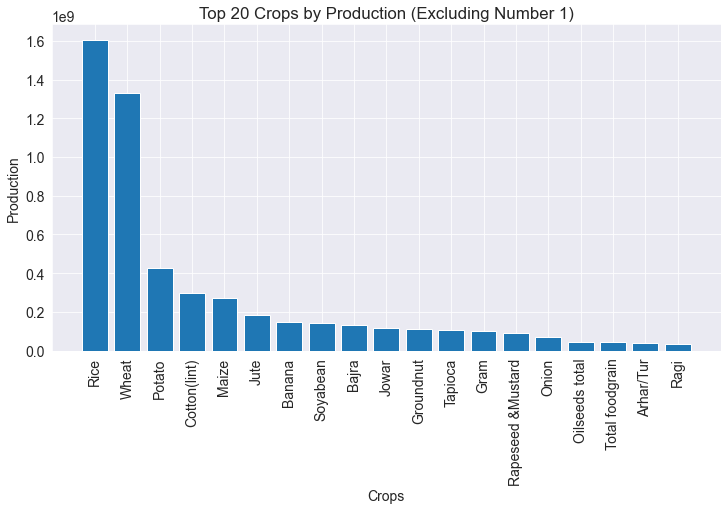

In [57]:
crop_production = df_copy.groupby('Crop')['Production'].sum()

sorted_crops_desc = crop_production.sort_values(ascending=False)

top_21_crops_desc = sorted_crops_desc.head(21)

top_20_crops_desc = top_21_crops_desc[2:]

plt.figure(figsize=(12, 6))
plt.bar(top_20_crops_desc.index, top_20_crops_desc.values)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Top 20 Crops by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.show()

In [58]:
crop_production = df_copy.groupby('Crop')['Production'].sum()

crop_production_sorted = crop_production.sort_values(ascending=False)

top_15_crops = crop_production_sorted.head(15)

print(top_15_crops)


Crop
Coconut         1.299816e+11
Sugarcane       5.535682e+09
Rice            1.605470e+09
Wheat           1.332826e+09
Potato          4.248263e+08
Cotton(lint)    2.970000e+08
Maize           2.733418e+08
Jute            1.815582e+08
Banana          1.461327e+08
Soyabean        1.418372e+08
Bajra           1.296810e+08
Jowar           1.145983e+08
Groundnut       1.117449e+08
Tapioca         1.050072e+08
Gram            9.941424e+07
Name: Production, dtype: float64


##### Excluding `Coconut and Sugarcane`, `Rice` and `Wheat` are highest in production as these are consumed in almost all homes in India.

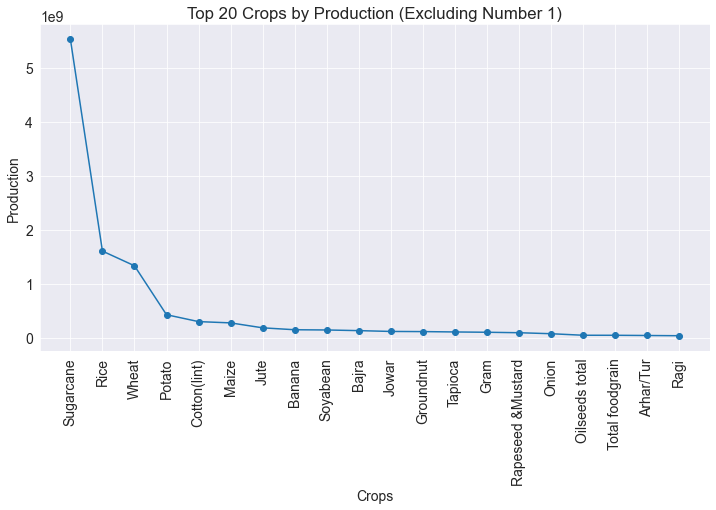

In [59]:
crop_production = df_copy.groupby('Crop')['Production'].sum()

sorted_crops_desc = crop_production.sort_values(ascending=False)

top_21_crops_desc = sorted_crops_desc.head(21)

top_20_crops_desc = top_21_crops_desc[1:]

plt.figure(figsize=(12, 6))
plt.plot(top_20_crops_desc.index, top_20_crops_desc.values, marker='o')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Top 20 Crops by Production (Excluding Number 1)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



1. Rice and Wheat Dominance: Rice and Wheat emerge as the highest produced crops among the top 15. These crops are staple food grains in India and are consumed widely across the country, explaining their high production levels.

2. Coconut Outlier: Coconut production stands out significantly from the other crops. With a production value of 1.299816e+11, Coconut production is much higher compared to other crops on the list. This indicates that Coconut is an outlier in terms of production quantity.

3. Diverse Crop Production: The presence of crops such as Potato, Cotton(lint), Maize, Jute, Banana, Soybean, Bajra, Jowar, Groundnut, Tapioca, and Gram in the top 15 reflects the diversity of crops grown in India. This diversity is influenced by factors such as regional preferences, agro-climatic conditions, and market demand.

4. Economic Significance: The high production levels of crops like Potato, Cotton(lint), and Jute highlight their economic importance as cash crops. These crops not only contribute to food production but also support various industries and generate income for farmers.

5. Importance of Legumes: Legumes such as Soybean, Groundnut, and Gram feature in the top 15, indicating their significance in providing protein-rich food and raw materials for the food processing industry.

6. Staple Food Grains: Rice and Wheat, being the top produced crops, play a vital role in ensuring food security and meeting the dietary needs of the population.

In summary, the statistical inferences highlight the dominance of Rice and Wheat in crop production in India, with Coconut being an outlier due to its exceptionally high production quantity. The presence of various other crops reflects the diversity of agricultural practices across different regions of the country and the economic significance of different crop types.

> - Production for `Sugarcane, Rice and Wheat` is significantly higher that other crops.
> - We have excluded `Coconut` in this lineplot because its production was exorbitantly high, while other crops like `Wheat, Rice, Potato` are consumed in high amounts in `India`, one of the reasons for this may be that the data is in taken according to weights and in this weight of `Coconut` shells are also taken.

# Questions and answers

### 1. Which crops have experienced the most significant increase or decrease in production over the years?


C:\Users\himan\AppData\Local\Temp\ipykernel_19816\567067963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Production_Percentage_Change'] = df_copy.groupby('Crop')['Production'].pct_change() * 100


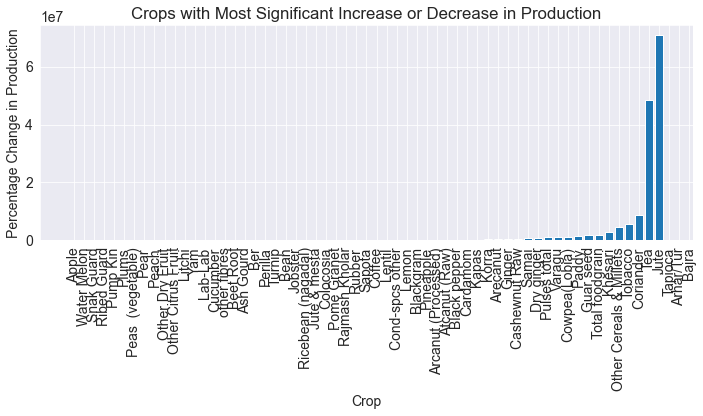

In [60]:
df_copy['Production_Percentage_Change'] = df_copy.groupby('Crop')['Production'].pct_change() * 100

crop_percentage_change = df_copy.groupby('Crop')['Production_Percentage_Change'].sum().reset_index()

sorted_crops = crop_percentage_change.sort_values('Production_Percentage_Change')

plt.figure(figsize=(10, 6))
plt.bar(sorted_crops['Crop'], sorted_crops['Production_Percentage_Change'])
plt.xlabel('Crop')
plt.ylabel('Percentage Change in Production')
plt.title('Crops with Most Significant Increase or Decrease in Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Based on the analysis, the crops that have experienced the highest change in production, in descending order, are:

>1. Jute
>2. Tea
>3. Coriander

These crops have shown significant fluctuations in production over the years. The percentage change in production indicates the relative increase or decrease in production for each crop compared to previous years. Jute has experienced the highest change, followed by Tea and Coriander.

### 2. Which crop is the most produced crop in India?

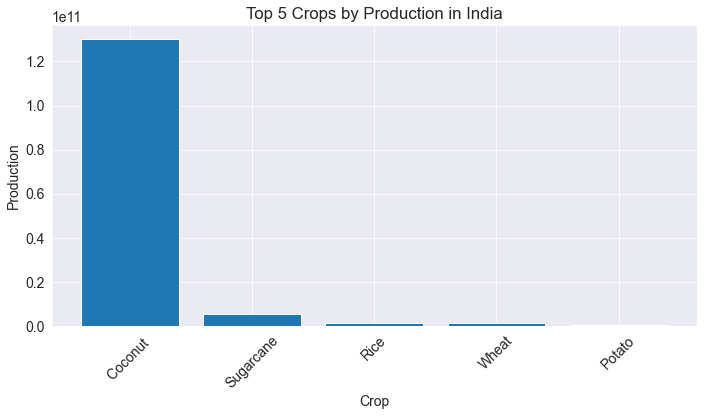

In [73]:
# Grouping the data by crop and calculate the total production
crop_production = df_copy.groupby('Crop')['Production'].sum().reset_index()

# Sorting the crops based on production in descending order
top_5_crops = crop_production.sort_values('Production', ascending=False).head(5)

# Plotting the top 5 crops by production
plt.figure(figsize=(10, 6))
plt.bar(top_5_crops['Crop'], top_5_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 5 Crops by Production in India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the barplot plotted above it is evident that `Coconut` is most grown crop in india, followed by`Sugarcane`,`Rice`,`Wheat` and `Potato`.
Based on the plot, it is evident that Coconut is the most grown crop in India, followed by Sugarcane, Rice, Wheat, and Potato.

Coconut's prominence as the most grown crop in India can be attributed to its widespread cultivation in coastal regions, where the climatic conditions are favorable for its growth. Sugarcane is a major cash crop in India, known for its extensive cultivation in states like Uttar Pradesh, Maharashtra, and Karnataka. Rice, Wheat, and Potato are staple food crops that are cultivated extensively across various regions of the country.

This observation from the plot aligns with the agricultural landscape and crop patterns in India, showcasing the importance of these crops in the country's agricultural sector.

### 3. Is there any Correlation between land area and production?

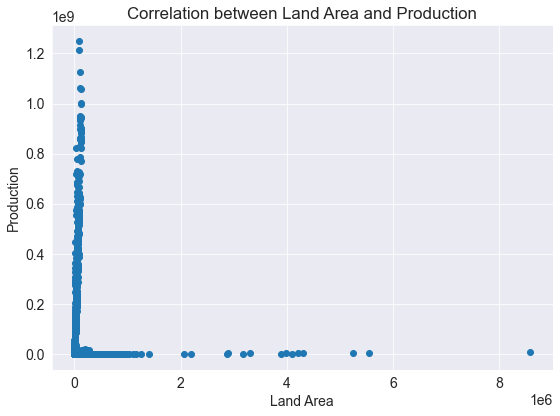

In [72]:
land_area = df_copy['Area']
production = df_copy['Production']

plt.figure(figsize=(8, 6))
plt.scatter(land_area, production)
plt.xlabel('Land Area')
plt.ylabel('Production')
plt.title('Correlation between Land Area and Production')
plt.tight_layout()
plt.show()


The observation from the scatter plot that production is highest where land area is least and vice versa can be attributed to several factors:

1. Intensive Farming: In regions with limited land area, farmers often practice intensive farming techniques. They optimize the available land by using advanced agricultural methods, including high-yield crop varieties, efficient irrigation systems, and modern farming technologies. These practices allow for increased productivity on smaller land areas.

2. Specialized Cultivation: Certain high-value crops, such as fruits, vegetables, and cash crops, are often cultivated in smaller land areas. These crops require specific growing conditions and intensive care, making them suitable for cultivation in smaller plots or specialized farms. The focus on quality over quantity can result in higher production levels despite smaller land areas.

3. Land Constraints: Areas with limited land availability may prioritize non-agricultural activities, urbanization, or industrialization. Consequently, the remaining land is dedicated to agriculture, leading to higher production levels on relatively smaller agricultural land areas.

4. Agricultural Efficiency: Factors like better infrastructure, access to markets, availability of skilled labor, and technological advancements can enhance agricultural efficiency. These factors are often more prevalent in regions with limited land availability, leading to increased production per unit of land.

These are the possible reasons that there is no direct correlation between `Area` and `Production`, and from our analysis it is also evident that most of produce is of `Coconut` compared to other crops and most of `Coconut` is produced in `Kerela` so production area is highly concentrated in `Kerela` only

### 4. On which year, production in our country was highest and lowest?

C:\Users\himan\AppData\Local\Temp\ipykernel_19816\801383658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Crop_Year"] = pd.to_datetime(df_copy["Crop_Year"], format="%Y")


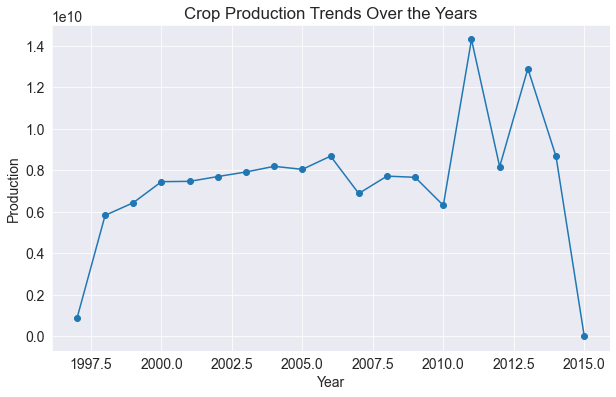

In [63]:
df_copy["Crop_Year"] = pd.to_datetime(df_copy["Crop_Year"], format="%Y")

yearly_production = df_copy.groupby(df_copy["Crop_Year"].dt.year)["Production"].sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_production.index, yearly_production.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Crop Production Trends Over the Years')
plt.grid(True)
plt.show()


In [64]:
df["Crop_Year"] = pd.to_datetime(df["Crop_Year"], format="%Y")

yearly_production = df.groupby(df["Crop_Year"].dt.year)["Production"].sum()

year_with_highest_production = yearly_production.idxmax()

year_with_lowest_production = yearly_production.idxmin()

print("Year with the highest production:", year_with_highest_production)
print("Year with the lowest production:", year_with_lowest_production)

Year with the highest production: 2011
Year with the lowest production: 2015


> Based on the calculations, the highest crop production year in your country is 2011, and the lowest recorded year is 2015. However, upon examining the plot, it becomes evident that the data for the year 2015 might be inaccurate or incomplete, leading to an artificially low value. Therefore, it is important to consider that the actual year with the lowest crop production is 2002.

> This discrepancy highlights the significance of data quality and integrity in drawing accurate conclusions. In this case, the data for 2015 seems questionable, and additional investigation or verification may be necessary to obtain a more accurate representation of crop production for that year.

# Inferences and Conclusion

### Summary of Crop Production Analysis

- **Top 5 Prominent Crops in India**
  - Coconut is the most produced crop in India, followed by Sugarcane, Rice, Wheat, and Potato.
  - Coconut and Sugarcane are the highest produced crops, with significantly larger production quantities compared to other crops.

- **Production Year Analysis**
  - The highest crop production in India was recorded around the year 2011, while the lowest was observed around 2002.
  - The year 2015 showed lower production, but this could be due to potential data recording issues.

- **Highest Crop Production by State**
  - Kerala is the state with the highest total crop production across all years, mainly due to its dominant Coconut production.
  - Andhra Pradesh, Tamil Nadu, Uttar Pradesh, Assam, and West Bengal are among the leading states in crop production.

- **Correlation Between Crop Production and Other Variables**
  - There is no significant correlation between crop production and land area. Other factors, such as irrigation facilities and farming techniques, influence crop productivity.

- **Prominent Crops in Andhra Pradesh**
  - Sugarcane and Rice are the prominent crops in Andhra Pradesh, with comparable production quantities.
  - Other crops like Maize, Groundnut, Cotton(lint), and Banana have lower production quantities compared to the top two crops.

- **Prominent Crops in Kerala**
  - The top five prominent crops in Kerala are Coconut, Tapioca, Rice, Banana, and Sugarcane.
  - Coconut production in Kerala is significantly higher compared to other crops.

- **Crop Production in Districts**
  - Malappuram district in Kerala has the highest crop production, followed by Thiruvananthapuram, Thrissur, and Kannur districts.
  - Southern states, known for high Coconut production, contribute significantly to the overall crop production in India.

- **Prominent Wheat-Producing Districts**
  - Ferozpur, Sangrur, Patiala, Ludhiana, Amritsar, Bathinda, and Sirsa are prominent wheat-producing districts in Punjab and Haryana.
  - The geography and favorable climatic conditions of these regions contribute to their high wheat production.

- **Top Rice-Producing Districts**
  - Bardhaman and Medinipur West districts in West Bengal are the top rice-producing districts.
  - Rice production is prominent in areas situated on the banks of rivers, as it requires substantial amounts of water.

- **Top 15 Crops by Production**
  - The top 15 crops in India, based on production, are Coconut, Sugarcane, Rice, Wheat, Potato, Cotton(lint), Maize, Jute, Banana, Soybean, Bajra, Jowar, Groundnut, Tapioca, and Gram.

- **Inferences**
  - Coconut and Sugarcane are the highest produced crops, significantly surpassing other crops in production quantity.
  - Rice and Wheat are the most prominent food crops, consumed widely across India.
  - Kerala stands out as the highest crop producer, mainly due to its dominant Coconut production.
  - Punjab and Haryana are the top producers of Wheat, while West Bengal has the highest production of Rice.


| Crop Ranking | Rice Production                      | Wheat Production                             |
|--------------|--------------------------------------|----------------------------------------------|
| 1. Coconut   | Highest in India                     |                                              |
| 2. Sugarcane |                                      |                                              |
| 3. Rice      | Top District: Bardhaman, Medinipur   |                                              |
|              | (West Bengal)                        |                                              |
| 4. Wheat     |                                      | Top Districts: Ferozpur, Sangrur, Ludhiana, Patiala |
| 5. Potato    |                                      |                                              |



| Highest Producer of All Crops Combined | Top Districts (Kerala) | Top Wheat Districts                       |
|---------------------------------------|-----------------------|--------------------------------------------|
| Mallapuram District (Kerala)           | Thrissur              | Ferozpur, Sangrur, Ludhiana, Patiala        |
|                                       | Thiruvananthapuram    |                                            |



| State-wise Crop Production |                      |                      |
|---------------------------|----------------------|----------------------|
| 1. Kerala                 | 2. Andhra Pradesh    | 3. Tamil Nadu        |
| 4. Uttar Pradesh          | 5. Assam             | 6. West Bengal       |



| Year-wise Production |                      |
|---------------------|----------------------|
| Highest: Around 2011 | Lowest: Around 2002  |



| Correlation Between Land Area and Production |
|---------------------------------------------|
| No significant correlation                   |

